In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
import re
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Chance\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv("Data_Train.csv")

In [3]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [4]:
df.Genre.value_counts()

Action & Adventure (Books)                       947
Romance (Books)                                  419
Biographies & Autobiographies (Books)            373
Crime, Thriller & Mystery (Books)                276
Contemporary Fiction (Books)                     256
Comics & Mangas (Books)                          197
Mangas                                           181
Music Books                                      122
Humour (Books)                                    98
Design                                            95
Dictionaries                                      83
Handicrafts, Decorative Arts & Crafts (Books)     79
Cinema & Broadcast (Books)                        78
Arts History, Theory & Criticism (Books)          72
Healthy Living & Wellness (Books)                 71
Writing Guides (Books)                            71
Language Learning & Teaching (Books)              71
Indian Writing (Books)                            70
Computer Science Books                        

In [5]:
df.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

In [6]:
df.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


In [7]:
df.shape

(6237, 9)

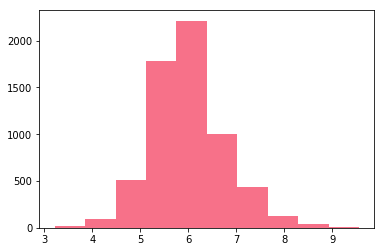

In [8]:
plt.hist(np.log(df["Price"]))
plt.show()

In [9]:
df.sort_values("Price")[:]

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
418,Coluring Book of Numbers (Colouring Book),Maple Press,"Paperback,– 24 Mar 2014",2.0 out of 5 stars,1 customer review,Coloring allows a child to relax and be comfor...,Visual Arts,"Arts, Film & Photography",25.00
5068,Biography of Swami Vivekananda,RPH Editorial Board,"Paperback,– 2016",3.7 out of 5 stars,7 customer reviews,The life of Swami Vivekananda has fascinated s...,Literature Encyclopedias,"Biographies, Diaries & True Accounts",25.00
2079,Biography: S.C. Bose,RPH Editorial Board,"Paperback,– 2015",3.1 out of 5 stars,7 customer reviews,There are many things we know about the life o...,"Biographies, Diaries & True Accounts (Books)","Biographies, Diaries & True Accounts",28.00
1210,Brush up Your English,S.T.Imam,"Paperback,– 2017",3.8 out of 5 stars,7 customer reviews,A book on 'Brush up Your English'.,Language Learning & Teaching (Books),"Language, Linguistics & Writing",30.00
4000,Colouring Book of Animals,Maple Press,"Paperback,– 18 Sep 2014",4.0 out of 5 stars,6 customer reviews,Coloring allows a child to relax and be comfor...,Visual Arts,"Arts, Film & Photography",30.00
1456,Biography: Dr C.V. Raman,RPH Editorial Board,"Paperback,– 2015",4.1 out of 5 stars,4 customer reviews,The Biography of Dr. C.V. Raman is the life sk...,"Biographies, Diaries & True Accounts (Books)","Biographies, Diaries & True Accounts",31.00
1082,Biography: Dhirubhai Ambani,RPH Editorial Board,"Paperback,– 2015",3.7 out of 5 stars,46 customer reviews,The biography of Dhirubhai Ambani is truly Ind...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",31.00
3894,Colouring Book - Vegetables,Maple Press,"Paperback,– 15 Dec 2014",5.0 out of 5 stars,1 customer review,Coloring allows a child to relax and be comfor...,Textbooks & Study Guides,"Arts, Film & Photography",36.00
5204,Colouring Books Of Shapes,Maple Press,"Paperback,– 1 Aug 2014",4.1 out of 5 stars,23 customer reviews,Coloring allows a child to relax and be comfor...,Textbooks & Study Guides,"Arts, Film & Photography",36.00
1492,Gooseberries (Penguin Little Black Classics),Anton Chekhov,"Mass Market Paperback,– 2015",3.0 out of 5 stars,1 customer review,"""Oh, good God,"" he kept saying with great reli...",Short Stories (Books),Romance,37.00


In [10]:
all_reviews = df['Synopsis']
all_sent_values = []
all_sentiments = []

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

In [12]:
sample = df['Synopsis'][101]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

First published in 1956, this collection of articles covers Wodehouse's feelings on United States, his adopted homeland all collected into one edition. Features a collection of articles originally from Punch magazine as well as America, I Like You, all with Wodehouse's usual wit and personality
Sentiment: 
0.8


In [13]:
for i in range(0,len(df['Synopsis'])):
    all_sent_values.append(sentiment_value(all_reviews[i]))

In [14]:
len(all_sent_values)

6237

In [15]:
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,6237):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')
        SENTIMENT_VALUE.append(1)

In [16]:
df['SENTIMENT_VALUE'] = SENTIMENT_VALUE

In [17]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,SENTIMENT_VALUE
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,5
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,5
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,5
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,1
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,5


In [18]:
df.shape

(6237, 10)

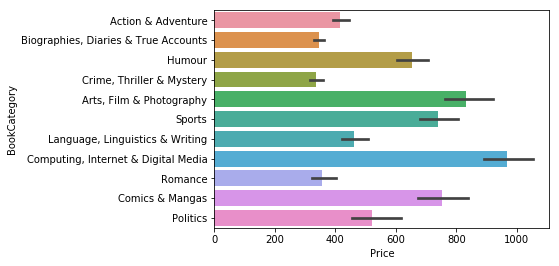

In [19]:
sns.barplot(x='Price', y='BookCategory', data=df)

In [20]:
df['Reviews']=df['Reviews'].str.replace('out of 5 stars', '')
df['Reviews'] = df['Reviews'].astype(float)

In [21]:
df['Ratings']=df['Ratings'].str.replace('customer reviews', '')

In [22]:
df['Ratings']=df['Ratings'].str.replace('customer review', '')

In [23]:
df['Ratings'] = df['Ratings'].apply(lambda x:re.sub(',(?!\s+\d$)', '', str(x)))

In [24]:
df['Ratings'][0]

'8 '

In [25]:
df['Ratings'] = df['Ratings'].astype(float)

In [26]:
df['Edition_type'] = df['Edition'].apply(lambda x : x.split(' ')[0])

df['Edition_type'] = df['Edition_type'].str.replace(',','')


In [27]:
df['Edition_type'] = df['Edition_type'].apply(lambda x:x[:-1])

In [28]:
df['Edition_year'] = df['Edition'].apply(lambda x :re.findall('\d+', str(x)))

In [29]:
df['Edition_year'] = df['Edition_year'].apply(lambda x :x[-1:])
df['Edition_year'][0]

['2016']

In [30]:
df['Edition_year'] = df['Edition_year'].apply(lambda x: re.sub('[^0-9]','', str(x)))
# new_string = ''.join(re.findall(r'\d+', str(df['Edition_year'][0])))
df['Edition_year'][0]

'2016'

In [31]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        return np.nan
    
df['Edition_year'] = df['Edition_year'].apply(lambda x: convert_to_float(x)) 
df['Edition_year'] = df['Edition_year'].astype(float)

In [32]:
#df = df.dropna(axis =0,subset=['Edition_year'])

In [33]:
# df['Edition_year'] = df['Edition_year'].replace(' ', np.NaN)
#df['Edition_year'] = df['Edition_year'].replace(r'^\s+$', np.nan, regex=True)

In [34]:
df['Edition_year'].fillna(np.nan)

0       2016.0
1       2012.0
2       1982.0
3       2017.0
4       2006.0
5       2009.0
6       2017.0
7       2018.0
8       2015.0
9       2013.0
10      2017.0
11      2018.0
12      1999.0
13      2002.0
14      2011.0
15      2015.0
16      2018.0
17      2016.0
18      1991.0
19      2016.0
20      2018.0
21      2018.0
22      2012.0
23      2014.0
24      2012.0
25      2011.0
26      2016.0
27      2014.0
28      2014.0
29      1989.0
         ...  
6207    2017.0
6208    2019.0
6209    2016.0
6210    2018.0
6211    2019.0
6212    2012.0
6213    2017.0
6214    2014.0
6215    2016.0
6216    2013.0
6217    2015.0
6218    2013.0
6219    2010.0
6220    2018.0
6221    2014.0
6222    2018.0
6223    2014.0
6224    2005.0
6225    2015.0
6226    2019.0
6227    2014.0
6228    2015.0
6229    2017.0
6230    2006.0
6231    2013.0
6232    2018.0
6233    2016.0
6234    2006.0
6235    2015.0
6236    2016.0
Name: Edition_year, Length: 6237, dtype: float64

In [35]:
# def convert_to_float():
#     for i in df['Edition_year']:
#         if 'np.nan' in i:
#             return np.nan
#         else:
#             return i.astype(float)

In [36]:
# df = df.dropna(axis = 0,subset=['Edition_year'])

In [37]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,SENTIMENT_VALUE,Edition_type,Edition_year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,5,Paperback,2016.0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,5,Paperback,2012.0
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00,5,Paperback,1982.0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,1,Paperback,2017.0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,5,Hardcover,2006.0


In [38]:
cat_col = ['BookCategory','Edition_type']

In [39]:
df.drop(["Author", "Synopsis", "Title","Edition", "Genre"], inplace=True, axis=1)

In [40]:
df.dtypes

Reviews            float64
Ratings            float64
BookCategory        object
Price              float64
SENTIMENT_VALUE      int64
Edition_type        object
Edition_year       float64
dtype: object

In [41]:
df_dummies = pd.get_dummies(data=df.copy(), columns=cat_col, drop_first=True)

In [42]:
df_dummies.head()

,Reviews,Ratings,Price,SENTIMENT_VALUE,Edition_year,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",...,Edition_type_Librar,Edition_type_Loos,Edition_type_Mas,Edition_type_Paperback,Edition_type_Perfec,Edition_type_Plasti,Edition_type_Produc,Edition_type_Shee,Edition_type_Spiral-bound,Edition_type_Tankobo
0,4.0,8.0,220.00,5,2016.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,3.9,14.0,202.93,5,2012.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,4.8,6.0,299.00,5,1982.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4.1,13.0,180.00,1,2017.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,5.0,1.0,965.62,5,2006.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_dummies.shape

(6237, 33)

In [44]:

# df_dummies['Edition_year'] = df_dummies['Edition_year'].astype(float)

In [45]:
df_dummies.head()

,Reviews,Ratings,Price,SENTIMENT_VALUE,Edition_year,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",...,Edition_type_Librar,Edition_type_Loos,Edition_type_Mas,Edition_type_Paperback,Edition_type_Perfec,Edition_type_Plasti,Edition_type_Produc,Edition_type_Shee,Edition_type_Spiral-bound,Edition_type_Tankobo
0,4.0,8.0,220.00,5,2016.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,3.9,14.0,202.93,5,2012.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,4.8,6.0,299.00,5,1982.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4.1,13.0,180.00,1,2017.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,5.0,1.0,965.62,5,2006.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df_dummies)

SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)

In [47]:
df_dummies_new = imp.transform(df_dummies)

In [48]:
df_dummies_new = pd.DataFrame(df_dummies_new, columns=list(df_dummies.columns))

In [49]:
df_dummies_no_missing = df_dummies.dropna()
df_dummies_no_missing = df[['Reviews', 'Ratings','BookCategory', 'Price']]

In [50]:
df_dummies_no_missing = pd.get_dummies(data=df_dummies_no_missing.copy(), columns=['BookCategory'], drop_first=True)

In [51]:
df.columns

Index(['Reviews', 'Ratings', 'BookCategory', 'Price', 'SENTIMENT_VALUE',
       'Edition_type', 'Edition_year'],
      dtype='object')

In [52]:
X = df_dummies_no_missing.drop(['Price'],axis =1)
y =df_dummies_no_missing['Price']

In [53]:
print(X.shape)
print(y.shape)

(6237, 12)
(6237,)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [122]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train,y_train)
y_predict_rf = regr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [124]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_predict_lr_model = lr_model.predict(X_test)

In [127]:
def rmsle(predicted,real):
    sum_ = 0
    for x in range(len(predicted)):
        p = np.log(abs(predicted[x]+1))
        r = np.log(real[x]+1)
        sum_=sum_+((p-r)**2)
    return (sum_/len(predicted))**0.5


In [128]:
predicted,real = lr_model.predict(X_train) , y_train

In [129]:
rmsle(lr_model.predict(X_train),list(y_train))

0.7502893892384164